In [0]:
from google.colab import files
uploaded = files.upload()

Saving ReadyToTrain.zip to ReadyToTrain.zip


In [0]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['jaffedbase.zip']), 'r')
data.extractall()

In [0]:
 !unzip ReadyToTrain.zip
 !unzip PreprocessedImages.zip

Archive:  ReadyToTrain.zip
Archive:  PreprocessedImages.zip
   creating: PreprocessedImages/
   creating: PreprocessedImages/images/


In [0]:
import numpy as np
from numpy import *
import cv2
import glob 
import matplotlib.pyplot as plt

In [0]:
dataset = '/content/jaffe';
folders = os.listdir(dataset)
imagenames__list = []

read_images = []        
print(folders)
for image in folders:
    read_images.append(cv2.imread(image, cv2.IMREAD_GRAYSCALE))
print(read_images[0])

In [0]:
from google.colab import files
uploaded = files.upload()



In [0]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['jaffedbase.zip']), 'r')
data.extractall()

In [0]:
data.printdir()

In [0]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [0]:
image=0
for image in folders:
    
    img = cv2.imread(dataset+'/'+image)
    print(image)
 
    if(image=='README' or image=='.DS_Store'):
        continue
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        cropped = img[y:y+h, x:x+w]    # To crop the image to get ROI.
   
    img_to_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
    img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])
    hist_equalization_result = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2BGR)
   
    cv2.imwrite('/content/PreprocessedImages/images/'+image,cropped)
   

In [0]:
preprocessedfolders = glob.glob('/content/PreprocessedImages/images/') 

In [0]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from keras import optimizers
import pandas as pd
import numpy as np

In [0]:
config = tf.ConfigProto()  #, device_count= {'GPU' : 1, 'CPU': 50}
config.gpu_options.per_process_gpu_memory_fraction = 0.4
session = tf.Session(config=config)
keras.backend.set_session(session)

In [0]:
from keras import backend as K
K.set_image_dim_ordering('tf')


In [0]:
path1 = '/content/PreprocessedImages/images/'
path2= '/content/ReadyToTrain/images/' 
print(os.listdir('/content'))

['.config', '__MACOSX', 'ReadyToTrain', 'ReadyToTrain.zip', 'PreprocessedImages', 'PreprocessedImages.zip', 'haarcascade_eye.xml', 'haarcascade_frontalface_default.xml', 'jaffe', 'jaffedbase.zip', 'sample_data']


In [0]:
import os
from PIL import Image
listing = os.listdir(path1) 

In [0]:
!apt-get -qq install -y sklearn.cross_validation

E: Unable to locate package sklearn.cross_validation
E: Couldn't find any package by glob 'sklearn.cross_validation'
E: Couldn't find any package by regex 'sklearn.cross_validation'


In [0]:
# SKLEARN
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import np_utils


# input image dimensions
img_rows, img_cols = 200, 200

# number of channels
img_channels = 1


In [0]:
listing = os.listdir(path1) 
num_samples=size(listing)
print(num_samples)

214


In [0]:
for file in listing:
    im = Image.open(file)   
    img = im.resize((img_rows,img_cols))
    gray = img.convert('L')
                #need to do some more processing here           
    gray.save(path2+file, "JPEG")


In [0]:
imlist = os.listdir(path2)

In [0]:
im1 = array(Image.open(path2 +imlist[0])) # open one image to get size
m,n = im1.shape[0:2] # get the size of the images
imnbr = len(imlist) # get the number of images
print(m)
print(n)

200
200


In [0]:
# create matrix to store all flattened images
immatrix = array([array(Image.open(path2+ im2)).flatten()
              for im2 in imlist],'f')

In [0]:
label=np.ones((180,),dtype = int)
print(label[2]);

1


In [0]:
i =0 ; 
for file in imlist:
    if 'HA' in file: 
        label[i:i+1]=0;
    if 'sa' in file:
        label[i:i+1]=1;
    if 'AN' in file:
        label[i:i+1]=2;
    if 'DI' in file:
        label[i:i+1]=3;
    if 'FE' in file:
        label[i:i+1]=4;
    if 'SU' in file:
        label[i:i+1]=5;
    if 'NE' in file:
        label[i:i+1]=6;
    i=i+1;
        
print(len(label),i);
    

180 180


180
180
(180, 200, 200)
[[0.10196079 0.14117648 0.08235294 ... 0.06666667 0.12156863 0.14509805]
 [0.08627451 0.10980392 0.15686275 ... 0.13333334 0.14901961 0.04705882]
 [0.11372549 0.1764706  0.47843137 ... 0.4745098  0.44705883 0.16862746]
 ...
 [0.08235294 0.10588235 0.40784314 ... 0.5882353  0.5529412  0.06666667]
 [0.12941177 0.11764706 0.38039216 ... 0.5137255  0.5254902  0.19215687]
 [0.15294118 0.03529412 0.16470589 ... 0.05490196 0.17254902 0.04313726]]


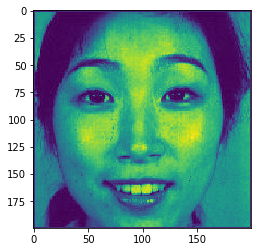

In [0]:
img_data_list=[]
img_list=os.listdir(path2)
i=0;
for img in imlist:
  
    i= i+1
    input_img=cv2.imread(path2 + img )
   
    input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    input_img_resize=cv2.resize(input_img,(200,200))
    img_data_list.append(input_img_resize)
print(i)  
print(len(img_data_list))
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)
print(img_data[0])
plt.imshow(img_data[0])
plt.show()

In [0]:
num_channel=1

In [0]:
if num_channel==1:
	if K.image_dim_ordering()=='th':
		img_data= np.expand_dims(img_data, axis=1) 
		print (img_data.shape)
	else:
		img_data= np.expand_dims(img_data, axis=4) 
		print (img_data.shape)
		
else:
	if K.image_dim_ordering()=='th':
		img_data=np.rollaxis(img_data,3,1)
		print (img_data.shape)
		
#%%
USE_SKLEARN_PREPROCESSING=False

(180, 200, 200, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  


In [0]:
#batch_size to train
batch_size = 32
# number of output classes
nb_classes = 7
# number of epochs to train
nb_epoch = 20

In [0]:
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(label, nb_classes)
print(len(Y));
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

#%%
# Defining the model
input_shape=img_data[0].shape
print(input_shape);
print(Y.shape);

180
(200, 200, 1)
(180, 7)


In [0]:
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

In [0]:

# STEP 1: split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
print(X_test);


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [0]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_train[1])

In [0]:
model = Sequential()


In [0]:
model.add(Convolution2D(64, 3,3,border_mode='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(200, 200,..., padding="same")`
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
model.add(Convolution2D(128, 3, 3))
model.add(Activation('relu'))
model.add(Convolution2D(128, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3))`
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3))`
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [0]:

adam = keras.optimizers.Adam(lr=0.5)
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])


In [0]:
# Viewing model_configuration

model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 200, 200, 64)      640       
_________________________________________________________________
activation_7 (Activation)    (None, 200, 200, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 198, 198, 64)      36928     
_________________________________________________________________
activation_8 (Activation)    (None, 198, 198, 64)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 97, 97, 128)       73856     
_________________________________________________________________
activation_9 (Activation)    (None, 97, 97, 128)       0         
__________

True

In [0]:
#%%

nb_epoch=20

# Training
hist = model.fit(X_train, y_train, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test),  shuffle=True)


Train on 144 samples, validate on 36 samples
Epoch 1/20
144/144 [==============================] - 6s 39ms/step - loss: 4.4374 - acc: 0.1458 - val_loss: 1.9570 - val_acc: 0.0833
Epoch 2/20
144/144 [==============================] - 1s 6ms/step - loss: 1.9536 - acc: 0.1319 - val_loss: 1.9473 - val_acc: 0.1667
Epoch 3/20
144/144 [==============================] - 1s 6ms/step - loss: 1.9486 - acc: 0.1597 - val_loss: 1.9466 - val_acc: 0.0833
Epoch 4/20
144/144 [==============================] - 1s 6ms/step - loss: 1.9510 - acc: 0.1875 - val_loss: 1.9654 - val_acc: 0.1389
Epoch 5/20
144/144 [==============================] - 1s 6ms/step - loss: 1.9311 - acc: 0.1458 - val_loss: 1.9128 - val_acc: 0.1944
Epoch 6/20
144/144 [==============================] - 1s 6ms/step - loss: 1.9329 - acc: 0.2222 - val_loss: 2.2515 - val_acc: 0.0833
Epoch 7/20
144/144 [==============================] - 1s 6ms/step - loss: 1.7581 - acc: 0.4444 - val_loss: 4.1043 - val_acc: 0.0833
Epoch 8/20
144/144 [==========

In [0]:
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.preprocessing.image import ImageDataGenerator

num_classes = 7
epochs= 10
#construct CNN structure
model = Sequential()

#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(200,200,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))
#------------------------------
#batch process
gen = ImageDataGenerator()
train_generator = gen.flow(X_train, y_train, batch_size=batch_size)

#------------------------------

model.compile(loss='categorical_crossentropy'
    , optimizer=keras.optimizers.Adam()
    , metrics=['accuracy']
)

#------------------------------

fit = True

if fit == True:
	model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) #train for randomly selected one
else:
	model.load_weights('/data/facial_expression_model_weights.h5') #load weights


Epoch 1/10
32/32 [==============================] - 8s 245ms/step - loss: 2.0082 - acc: 0.1503
Epoch 2/10
32/32 [==============================] - 4s 111ms/step - loss: 1.9186 - acc: 0.1951
Epoch 3/10
32/32 [==============================] - 4s 110ms/step - loss: 1.4513 - acc: 0.4531
Epoch 4/10
32/32 [==============================] - 4s 111ms/step - loss: 0.5716 - acc: 0.7921
Epoch 5/10
32/32 [==============================] - 4s 111ms/step - loss: 0.1772 - acc: 0.9366
Epoch 6/10
32/32 [==============================] - 4s 113ms/step - loss: 0.1947 - acc: 0.9365
Epoch 7/10
32/32 [==============================] - 4s 112ms/step - loss: 0.0788 - acc: 0.9716
Epoch 8/10
32/32 [==============================] - 4s 110ms/step - loss: 0.0775 - acc: 0.9786
Epoch 9/10
32/32 [==============================] - 4s 112ms/step - loss: 0.0507 - acc: 0.9864
Epoch 10/10
32/32 [==============================] - 4s 111ms/step - loss: 0.0029 - acc: 1.0000


In [0]:
val_loss, val_acc= model.evaluate(X_test, y_test)

36/36 [==============================] - 0s 12ms/step


In [0]:
print(val_loss, val_acc)

1.4838862154218886 0.7222222222222222


In [0]:
model.save('EmotionRecognitionColaboratory.model')

In [0]:
new_model = tf.keras.models.load_model('EmotionRecognition100.model')

(11, 200, 200)
[[0.5568628  0.56078434 0.5686275  ... 0.4509804  0.44705883 0.44313726]
 [0.5568628  0.5647059  0.57254905 ... 0.4509804  0.44705883 0.44705883]
 [0.5647059  0.5686275  0.5764706  ... 0.45882353 0.45490196 0.4509804 ]
 ...
 [0.38431373 0.39215687 0.30980393 ... 0.07843138 0.07058824 0.07843138]
 [0.30588236 0.34509805 0.23529412 ... 0.07450981 0.06666667 0.07450981]
 [0.2509804  0.3254902  0.19607843 ... 0.07058824 0.05882353 0.07058824]]


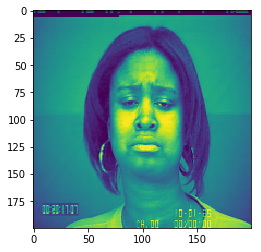

C:\Users\Varsha\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


In [0]:
imlist_test = os.listdir(path2+'\\'+'test')

img_data_list=[]
for img in imlist_test:
    input_img=cv2.imread(path2 + '\\'+ 'test'+ '\\' + img )
   
    input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    input_img_resize=cv2.resize(input_img,(200,200))
    img_data_list.append(input_img_resize)

#img_data = np.array(array([array(Image.open(path2 + '\\'+'test'+'\\'+ imlist[0]))]))
img_data = np.array(img_data_list);
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)
print(img_data[0])

plt.imshow(img_data[10])
plt.show()
img_data= np.expand_dims(img_data, axis=4) 
predictions=new_model.predict(img_data)

In [0]:
print(np.argmax(predictions[10]))

0


In [0]:
predictions=new_model.predict(X_test)

In [0]:
print(np.argmax(predictions[3]))

6


In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
y_pred = [np.argmax(y, axis=None, out=None) for y in predictions]
y_true = [np.argmax(y, axis=None, out=None) for y in y_test]

print(y_true[4])
print(y_pred[4])



2
1


In [0]:
cnf_matrix = confusion_matrix(y_true, y_pred)
cnf_matrix

array([[7, 1, 0, 0, 0, 0, 0],
       [2, 4, 1, 0, 0, 0, 0],
       [1, 5, 4, 0, 0, 0, 0],
       [0, 1, 1, 2, 2, 0, 0],
       [0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 4, 0],
       [2, 0, 0, 0, 0, 1, 3]], dtype=int64)

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [0]:
import itertools
class_names = []
class_names.append('Happy')
class_names.append('sad')
class_names.append('Angry')
class_names.append('Disgust')
class_names.append('Fear')
class_names.append('Surprise')
class_names.append('Neutral')

Confusion matrix, without normalization
[[7 1 0 0 0 0 0]
 [2 4 1 0 0 0 0]
 [1 5 4 0 0 0 0]
 [0 1 1 2 2 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 4 0]
 [2 0 0 0 0 1 3]]


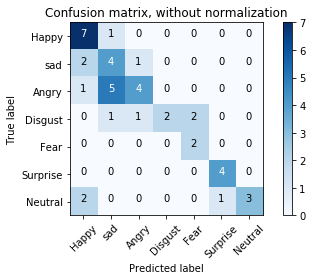

In [0]:
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')


Normalized confusion matrix
[[0.625      0.         0.         0.         0.125      0.125
  0.125     ]
 [0.14285714 0.71428571 0.         0.         0.14285714 0.
  0.        ]
 [0.         0.3        0.6        0.         0.1        0.
  0.        ]
 [0.         0.33333333 0.16666667 0.33333333 0.16666667 0.
  0.        ]
 [0.         0.         0.         0.         1.         0.
  0.        ]
 [0.         0.         0.         0.         0.25       0.75
  0.        ]
 [0.         0.         0.         0.         0.         0.
  1.        ]]


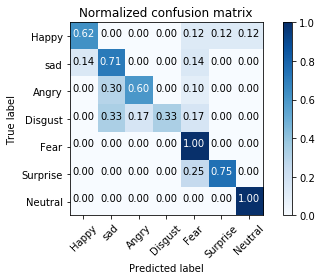

In [0]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [0]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

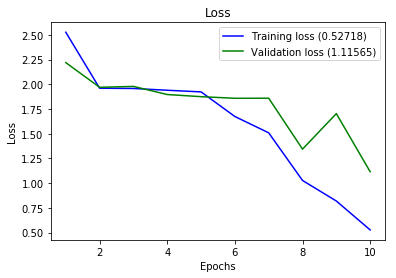

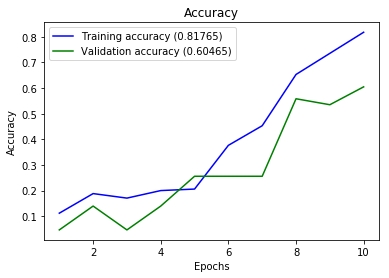

In [0]:
plot_history(hist);

In [0]:
## multiclass or binary report
## If binary (sigmoid output), set binary parameter to True
def full_multiclass_report(model,
                           x,
                           y_true,
                           classes,
                           batch_size=32,
                           binary=False):

    # 1. Transform one-hot encoded y_true into their class number
    if not binary:
        y_true = np.argmax(y_true,axis=1)
    
    # 2. Predict classes and stores in y_pred
    y_pred = model.predict_classes(x, batch_size=batch_size)
    
    # 3. Print accuracy score
    print("Accuracy : "+ str(accuracy_score(y_true,y_pred)))
    
    print("")
    
    # 4. Print classification report
    print("Classification Report")
    print(classification_report(y_true,y_pred,digits=5))    
    
    # 5. Plot confusion matrix
    cnf_matrix = confusion_matrix(y_true,y_pred)
    print(cnf_matrix)
    plot_confusion_matrix(cnf_matrix,classes=classes)

# New Section